In [1]:
import pandas as pd
import numpy as np

## Bayesian A/B Testing

1. What is Bayesian inference?
    - What is it?
    - priors, data, posterios, etc
    - How it differs to Frequentist?
2. Main differences between Bayesian and Frequentist A/B Testing
    - What is Bayesian A/B Testing and how it differs from the frequentist approah
    - advantages and disadvantages
    - learn about how to describe a Bayesian result
3. Work out a simple Bayesian A/B tTesting example to get the ideaof how it works
4. Create a minimum viable product on Bayesian A/B Testing with misc med data
    - demonstrate the results you get from the Frequentist vs Bayesian methods

## Bayesian Inference
https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348 <br>
https://towardsdatascience.com/what-is-bayesian-inference-4eda9f9e20a6 <br>
https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/
### What is it?

#### Bayesian inference is the process of deducing properties about a population or probability distribution from data using Bayes' theorem

<img src="images/bayes-theorem.png" width="600" height="400">

#### where A and B are events; P(A|B) is the conditional probability that event A occurs given that event B has already occured (same for P(B|A)); and P(A) and P(B) are the marginal probabilities of event A and event B 

### Example

#### 52 cards in a pack, 26 of them are red and 26 are black. **What is the probability of the card being a 4 given that we know the card is red?** 

### Solution

#### event A - the card picked is a 4 and event B - the card is red. Hence, P(A|B) = P(4|red) is what we want to calculate. Let's solve for the right-hand side: 
#### - P(B|A) = P(red|4) = 0.5 as 2 of the cards being 4 are red and 2 are black
#### - P(A) = P(4) = 4/52 = 1/13 as 4 of the cards are numbered 4
#### - P(B) = P(red) = 0.5 as 2 of 4 cards are red 
#### When we substitue into the equation P(A|B) = 1/13

#### In this example we have used single numbers for each term in the theorem. However, there may be times when single numbers are not appropriate. For example, we might have a probability of P(A) in between a range of values 

#### Bayes' theorem in a more data sciency way 

<img src="images/bayes-theorem2.png" width="600" height="400">

#### - P(hypothesis|data) is the posterior distribution. This is the distribution representing our belief about the hypothesis after observing the data. This is what we are trying to find out.
#### - P(data|hypothesis) is the likelihood of observing the data given our hypothesis. 
#### - P(hypothesis) is the prior distribution. It represents the strength of our beliefs about the true value of the hypothesis independently from the data.
#### - P(data) is called the evidence and represents the data we have. It is a normalising constant, which makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is = 1. 

## Difference between Frequentist and Bayesian Approach


#### The frequentist (classical) definition of probability is based on frequencies of events while the Bayesian definition of probability is based on our knowledge of events. Or what the data says vs what we know from the data

#### Imagine you have lost your phone at home and you use your friend's phone to call your phone - your phone starts ringing. How do you decide where to look for your phone? The frequentist will use their ears to identify the most likely area fro which the sound is coming. The Bayesian, would also use their ears, but in addition they would recall which areas of their home they've previously lost their phone and take this into account. So, Bayesian also incorporates prior knowledge. 

### Example: coin flipping

#### A coin flips heads up with probability $\theta$ and tails with probability 1 - $\theta$. Let's flip a coin 11 times, and it ends up heads 8 times. Would you bet for or against the event that the next 2 tosses turn up heads?

#### Let X be a random variable representing the coin. where X=1 is heads and X=0 is tails such that P(X=1) = $\theta$ and P(X=0) = 1- $\theta$. Let denote our data (8 heads, 3 tails). Now we want to estimate the value of the parameter $\theta$, so that we can calculate the probability of seeing 2 heads in a row. 

### Frequentist Solution:

#### The frequentist wants to max the likelihood. What value of $\theta$ will maximize the probability that we got D?
$\large L(\theta|D) =  argmaxP(D|\theta)$
#### The 11 coin flips follow a binomial distribution with n=11 trials and k=8 successes. The max likelihood is then 8/11 = 0.73. Assuming the coin flips are independent, we can calculate the probability of seeing 2 heads in a row: 
$\large P(X=1)*P(X=1) = L^2 = (\frac{8}{11})^2 = 0.53$
#### Since the probability of seeing 2 heads in a row is larger than 0.5, we would bet for!

<img src="images/likelihood.png" width="400" height="400">

### Bayesian Solution:

#### As the bayesian, we want to max the posterior. What value of $\theta$ will max the probability of $\theta$ given D?
$\large P(\theta|D) =  argmax \frac{P(D|\theta)*P(\theta)}{P(D)}$

#### where P(D|\theta) is the likelihood, which is already found and = 0.73. The only thing that is left is the prior distribution, which describes our initial knowledge on $\theta$. A good distribution to choose here is Beta distribution because it's defined on the interval [0,1], and $\theta$ is a probability, which has to be between 0 and 1. Now we need to set the prior distribution in suh a way that we incorporate what we already know about $\theta$ prior to seeing the data. We know that the coins a pretty fair and we assume a prior beta distribution of $\theta$ to be 0.5 ($\alpha$=2, $\beta$=2)

<img src="images/posterior.png" width="400" height="400">

#### The posterior distribution is approximated by the likelihood and the prior distribution. We can see on the plot that the posterior distribution gets dragged a little more to the right, making the posterior estimate different from the likelihood. 

$\large MAP = \frac{\alpha + k - 1}{\alpha + \beta + n - 2} = \frac{2+8-1}{2+2+11-2}=\frac{9}{13} = 0.69$

#### Use the MAP to calculate the probability of seeing 2 heads in a row, we find that we will bet against it
$\large P(X=1)*P(X=1) = MAP^2 = (\frac{9}{13})^2 = 0.48 < 0.5$

#### We are using a point estimate of the prior distribution here. However, in most cases we would have a whole prior distribution. 

## Differences between Bayesian and Frequentist A/B testing
https://www.moengage.com/blog/understanding-bayesian-ab-testing-analyze-experiment-results/ <br>
https://towardsdatascience.com/a-b-testing-with-probabilistic-programming-and-pymc3-part-i-7ae52d45bc41 <br>
https://towardsdatascience.com/bayesian-a-b-testing-in-pymc3-54dceb87af74

### A/B Testing
#### A/B testing is a widely used research methodology for comparing two variants (A and B) of a single variable and finding the difference. It has many applications but it is most popular for comparing layouts of websites, apps, etc..
#### It is a term used for randomized experiment to arrive at the optimal choice supported by data. We randomly assign target users to the test group and if the randomization procedure is correct, we can attribute any difference in outcomes (e.g. conversion rates) between the two or multiple groups to the change we are testing without having to account for other sources of variation affecting users behaviour.

### Differences with Fequentist Approach

#### - If given some dataset and you were asked to find the mean and variance of the data, your frequentist output would simply be a numerical value mapped to the mean and a numerical value mapped to the variance. However, in the bayesian approach, you’re no longer looking for a number but a distribution. Frequentists only treats random events probabilistically and doesn't quantify the uncertainty in fixed but unknown values. Bayesian stats, on the other hand, defines probability destributions over possible values of a parameter which can then be used for other purposes;

#### - As a bayesian, you use your prior knowledge from the previous experiments and try to incorporate this information into your current data. As a frequentist, you are using only data from you current experiment;

### Problems with classical approach
#### Classical approach - to understand results we come across terms like significance, p-value, confidence interval. You create a null hypothesis that all variations are same and then by running the experiment you try and find evidence to reject the null hypothesis
   - Problems
        - null hypothesis tests and p-values are hard to understand and explain. Results are binary - you can either reject the null hypothesis or fail to reject it
        - p-values tells only how often you see current results purely by chance. It is often misunderstood as the probability that the experiment group performs better than the control group. Confidence intervals also do not directly answer 95% probability of revenue/click through rate, etc in a range
        - sometimes we are not just interested in whether the experiment group performs better than the control group but also how much better - sometimes this is not easy to test 
        - it requires us to fix a sample size

### Bayesian A/B Testing framework

#### Step 1: we form our prior belief about what should be true about the data
#### Step 2: choose a statistical model (markov chains, bayesian bandits, etc) which reflects our beliefs for our parameter $\theta$ given the data
#### Step 3: from the evidence/observed data, we update our beliefs; we compute the posterior distributions where the posterior distribution is a probability distribution which portrays our updated beliefs about our parameter  after observing the data
#### Step 4: we sample from the posterior distributions and use these samples to make statistical inferences

### How to describe a Bayesian result

#### 1. Beta distribution - the result (e.g. click through rate) is thought in terms of a probability distribution which represents our belief based on the sample size. 

<img src="images/beta.png" width="600" height="600">

#### E.g. Above we can see that the click through rate of 50% is inferred over a sample size of 50. 

#### 2. 95% Credible Interval
#### The spread of the curve represents how precisely the experiment has measured the CTR. Peak at about 0.5 (50%) represent it is the most probable value and other values on both side have some chance of being true CTR. The 95% credible interval represents range in which CTR might fall with probability 0.95. For the CTR above it is calculated as (37, 63). The wider this interval the wider the uncertainty. As the sample size grows this spread squeezes.

#### 3. Chance of beating
#### It represents how likely it is that a variation beats other variation or all other variations. Below we have a 2 variate example and we represent belief in CTR of both variations using probability distributions. 

#### A (in blue): impressions 50 clicks 20 CTR 40% credible interval (28, 54)
#### B (in orange): impressions 50 clicks 25 CTR 50% credible interval (37, 63)

<img src="images/chance-of-beating.png" width="600" height="600">

#### here we cannot assume that B is better. Means are quite separate apart, but there is some overlap between distributions. Credible interval above also highlights this overlap region. To quantify this uncertainty we calculate the probability of one variation beating another i.e. if you randomly draw a sample for Variation A and for Variation B, what are the chances that sample from B would have higher CTR than that of A

#### Chance of B beating = 84%

# Example

#### Imagine that you operate a moderately successful online store with around 10,000 visitors every day. Around 100 of these 10,000 people actually buy something from your shop — your so-called conversion rate is about 100/10,000 = 1%, which is rather small. Most online shops achieve conversion rates of around 1-3%, Amazon more than 10%. Let's increase the conversion rates. Hence, we are testing if a red buy button would be more inviting over a blue buy button. 

<img src="images/ex.png" width="400" height="400">

#### We randomly assign new visitors to our shop to either team blue (control group - what happens if you leave everything as is) or team red (test group - what happens if you do some kind of intervention) with a 50% probability. People in team blue will see the blue buy button, team red - the red button. After running this process for some time you check which team achieved a higher conversion rate.

# Preparing the A/B Test

In [6]:
# 10000 visitors in 1 day randomly grouped
# if a visitor bought sth (encoded in 1) - otherwise 0
# groups have different size as in reality this is usually the case - still close to the 50:50 split though

np.random.seed(0)
# generate data - the conversion rates below is not something we know in advance and let's pretend we don't know how the data was geenrated
blue_conversions = np.random.binomial(1, 0.01, size=4800) # 1% control group conversion rate 
red_conversions = np.random.binomial(1, 0.012, size=5200) # 1.2% test group conversion

# the share of visitors who bought something
print(f'Blue: {blue_conversions.mean():.3%}')
print(f'Red: {red_conversions.mean():.3%}')

Blue: 0.854%
Red: 1.135%


##### This indicates that the red button might perform better, but we can't really know at this point. Even if the conversion rates across the different groups were exactly the same, one group would end up with more conversions that the other one wth a high probability. We still have to rule out that this happened only due to mere chance and this is exactly what an A/B test is for.

# Classical approach

### Set up the hypothesis
#### H0: blue is better and H1: red is better

In [7]:
# compute Welch's test
from scipy.stats import ttest_ind

print(f'p-value: {ttest_ind(blue_conversions, red_conversions, equal_var=False, alternative="less").pvalue:.1%}')

p-value: 7.8%


#### Given that H₀ is true, the chance that we get our observed or an even more extreme outcome is at most 7.8%. Since 7.8% > 5%, we keep the null hypothesis. It’s not evident that the red button is significantly better, so we just leave the blue button.

#### WRONG interpretation: The probability that blue is better is 7.8%.

#### Being able to formulate such a clear and short statement is desirable. This is where Bayes come to the rescue.

# The Bayesian Way

- It enables you to make statements about one version being better than the other one with a certain probability. Just what we want.
- You don’t have to know all the statistical tests. You can just make up a proper generative model.

#### Parameters we want to infer
- the conversion rate of the blue button and
- the conversion rate of the red button.

#### Decide for a prior distribution for both parameters
- as conversion rates can be between 0 and 1 - a Beta distribution makes sense
- it has 2 parameters $\alpha$ and $\beta$and we can create diverse distributions by varying them
- because we know that the conversion rates arerater small, good priors for both of them are beta($\alpha$,$\beta$)= beta(1, 99)

<img src="images/beta1.png" width="600" height="600">

- now let's model how the outcomes that we observed (arrays containing 0 and 1) are connected to these parameters
- the straightforward way is to use Bernoulli variables, as they can take only the values 0 and 1 and use a single probability parameter
    - Bernoulli distribution - the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability 1-p
    - if it was number of conversions - we can use Binomial distribution

In [10]:
import pymc3 as pm
with pm.Model():
    # prior distribution
    blue_rate = pm.Beta('blue_rate', 1, 99)
    red_rate = pm.Beta('red_rate', 1, 99)
    
    # design the output of the model and additionally give it the observations from our A/B test preparation using the observed parameter
    blue_obs = pm.Bernoulli('blue_obs', blue_rate, observed=blue_conversions)
    red_obs = pm.Bernoulli('red_obs', red_rate, observed=red_conversions)
    
    # generate the posterior distributions
    trace = pm.sample(return_inferencedata=True)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [red_rate, blue_rate]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 425 seconds.


In [11]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

## Posterior distributions of the conversion rates

array([<AxesSubplot:title={'center':'blue_rate'}>,
       <AxesSubplot:title={'center':'red_rate'}>], dtype=object)

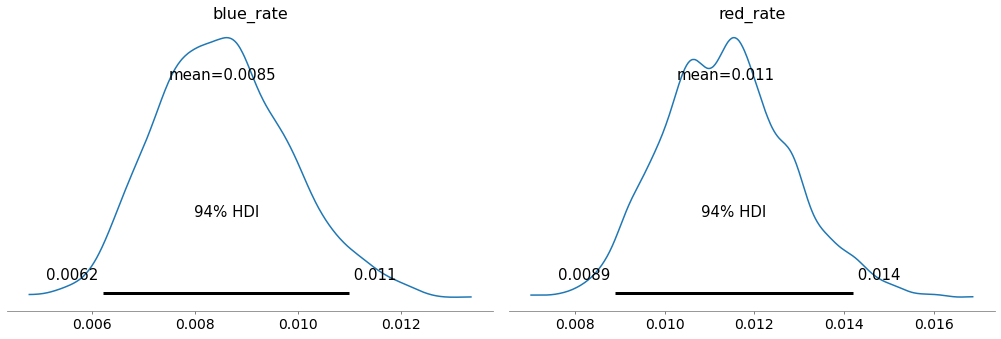

In [12]:
import arviz as az

az.plot_posterior(trace)

#### Max posterior estimated conversion ratefor the blue group (control) is 0.854% and around 1.1% for the red group (test). Also, the credible intervals for the blue estimates are 6.2% and 1.1% with a 94% probability. 

#### What is the probability that the conversion rate of the red button is higher than the one of the blue button? To answer this, we can just sample both posterior distributions and see, how often the red rate is higher than the blue rate.

In [13]:
# the samples are stored in within the trace object

blue_rate_samples = trace.posterior['blue_rate'].values
red_rate_samples = trace.posterior['red_rate'].values
print(f'Probability that red is better: {(red_rate_samples > blue_rate_samples).mean():.1%}.')

Probability that red is better: 92.3%.


### The red button is better with a probability of 92%

## Create a minimum viable product on Bayesian A/B testing with misc med data
    - demonstrate the result you get from frequentist vs bayesian methods

#### Time Period when commission rates were changed is April, 2021 till June, 2021 inclusive

#### Estimates:
- **Non-Key Brokers - April-Jun, 2020 - Control group - no commission change**
    - Sample size = number of quotes = 2371
    - Binds = 1193
    - Q2B = 50%
    
- **Non-key brokers - April-Jun, 2020 - Test group - commission drop**
    - Sample size = number of quotes = 1731
    - Binds = 893

<img src="images/data-miscmed.png" width=150 height=150 />


## Classical Approach

#### Binomial Test
##### Does the change in the commission rate result in a higher q2b rates that are statistically significant?
##### H0: the q2b rates haven't changed vs H1: the q2b rates have changed

In [2]:
from scipy.stats import binom_test

control_size = 2371
test_size = 1731
control_q2b = 0.503
test_binds = 893

p_value = binom_test(x=test_binds, n=test_size, p=control_q2b, alternative='less') # upper-tailed test 
print (f"The probability that the observed random variable has occurred by random chance is {p_value}\n")
print(f"Is p_value < 0.05?: {p_value<0.05}\n")

if p_value>0.05:
    print("We accept the null hypothesis since p_value is < 0.05 with 95% confidence.\nThe drop in the commission rates hasn't changed the q2b.")
elif p_value<0.05:
    print("We reject the null hypothesis since p_value is < 0.05 with 95% confidence.\nThe drop in the commission rates has impacted the q2b and it changed.")

The probability that the observed random variable has occurred by random chance is 0.8635461706563853

Is p_value < 0.05?: False

We accept the null hypothesis since p_value is < 0.05 with 95% confidence.
The drop in the commission rates hasn't changed the q2b.


#### Fisher's Test

##### What are the odds of a bind in the test group as opposed to the odds in the control group?

#### The table below is 2x2 contingency table with entities corresponding to the categorical variables of interest - conversion (yes/no) and groups (Test/Control).
#### The outcomes of the test are:
        - the odds ratio - gives us the relative difference in the proportion of customers that are converted in the control and test groups
        - p-value - tells us if the difference is statistically significant

In [3]:
import pandas as pd

control_binds = 1193
test_no_binds = test_size-test_binds
control_no_binds = control_size-control_binds

data = pd.DataFrame([[test_binds,control_binds],[test_no_binds, control_no_binds]],columns=['Test','Control'],index=['bind','no-bind'])
data

,Test,Control
bind,893,1193
no-bind,838,1178


In [46]:
# use stats package to find the p-value and the odds ratio found manually above
from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact([[test_binds,control_binds],[test_no_binds, control_no_binds]], alternative='greater')
print(f"The odds ratio is {oddsratio:.2f}\n")
print("We confirm that the test group are 5% more likely to bind than the control test.\n")
print(f"Is p_value < 0.05?: {pvalue<0.05}\n")
print(f'P-value:{pvalue}\n')
if pvalue>0.05:
    print("We accept the null hypothesis with 95% confidence.\nThe 5% likelihood of q2b increase in the test group IS NOT statistically significant.")
elif pvalue<0.05:
    print("We reject the null hypothesis with 95% confidence.\nThe 5% likelihood of q2b increase in the test group IS statistically significant.")

The odds ratio is 1.05

We confirm that the test group are 5% more likely to bind than the control test.

Is p_value < 0.05?: False

P-value:0.21964172890379235

We accept the null hypothesis with 95% confidence.
The 5% likelihood of q2b increase in the test group IS NOT statistically significant.


## Bayesian Approach

#### Prior assumptions

In [7]:
import pymc3 as pm

# generate data
control_q2b = 0.5
test_q2b = 0.52

np.random.seed(0)
control = np.random.binomial(1, control_q2b, size=control_size) 
test = np.random.binomial(1, test_q2b, size=test_size) 

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


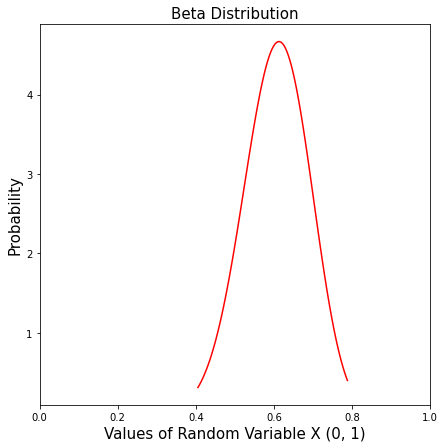

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import beta
#
# Set the shape paremeters
#
a, b = 20,13
#
# Generate the value between
#
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
#
# Plot the beta distribution
#
plt.figure(figsize=(7,7))
plt.xlim(0, 1)
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title('Beta Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

In [8]:
# Control group
with pm.Model() as model_control:
    #set the prior distribution of $p_A$.
    p_control=pm.Beta('p_Control', 20, 13)  
    
    #fit the observed data to our model 
    control_prior=pm.Bernoulli("obs", p=p_control, observed=control)
        
    #MCMC algorithm 
    step=pm.Metropolis()
    #sampling from the posterior distriubtion. 
    trace_control=pm.sample(step=step, return_inferencedata=True)
    
# Test group
with pm.Model() as model_test:
    #set the prior distribution of $p_A$.
    p_test=pm.Beta('p_Test', 20, 13)  
    
    #fit the observed data to our model 
    test_prior=pm.Bernoulli("obs", p=p_test, observed=test)
    
    #MCMC algorithm 
    step=pm.Metropolis()
    #sampling from the posterior distriubtion. 
    trace_test=pm.sample(step=step, return_inferencedata=True)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_Control]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 74 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_Test]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 59 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
#the sample mean-an estimate for Test
samples_posterior_test=trace_test.posterior['p_Test'].values
print(f'Test: {samples_posterior_test.mean()}')

#the sample mean-an estimate for Control
samples_posterior_control=trace_control.posterior['p_Control'].values
print(f'Control: {samples_posterior_control.mean()}')

Test: 0.5441529864578378
Control: 0.5040290881386795


#### Credible intervals

<AxesSubplot:title={'center':'p_Test'}>

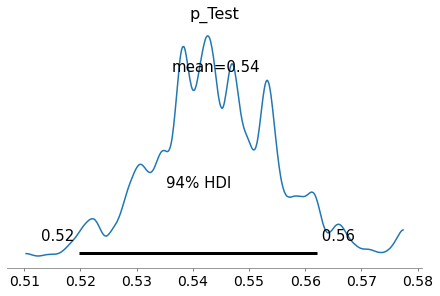

In [10]:
import arviz as az
az.plot_posterior(trace_test)

<AxesSubplot:title={'center':'p_Control'}>

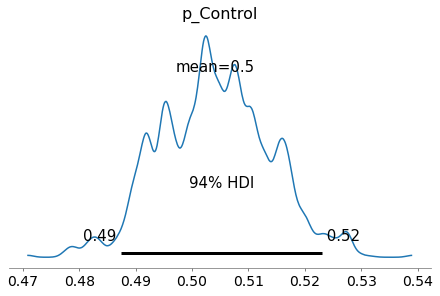

In [11]:
import arviz as az
az.plot_posterior(trace_control)

#### Chance of beating

In [12]:
print(f'Probability that Test is better: {(samples_posterior_control > samples_posterior_test).mean():.1%}.')

Probability that Test is better: 0.4%.


#### We can see that the Test group is performing better than the Control group. How much better though?

#### But how much better? There are two metrics we can use to answer this question:
- (a) The absolute difference between the two means.
- (b) The relative difference between the two means.

#### (a) The absolute difference between the two means.

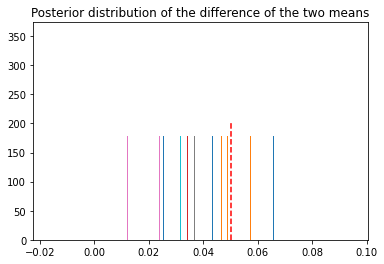

In [21]:
difference=samples_posterior_test-samples_posterior_control

plt.hist(difference, bins=40, density=True)
plt.vlines(0.05, 0, 200, linestyle='--', color='red')
plt.title('Posterior distribution of the difference of the two means')
plt.show()

In [18]:
#probability of 5% q2b increase in the Test group
100*len(difference[difference>0.05])*1.0/len(difference)

0.0

#### We are 0% confident that the q2b in the Test group is 5% higher than the q2b in the Control group

#### (b) The relative difference between the two means.

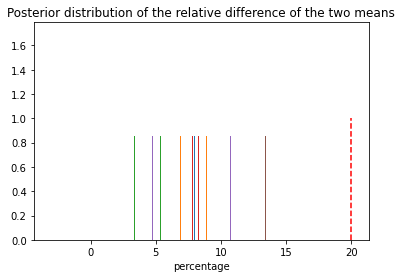

In [22]:
rel_difference=100*(samples_posterior_test-samples_posterior_control)/samples_posterior_control

plt.hist(rel_difference, bins=40, density=True)
plt.vlines(20, 0, 1, linestyle='--', color='red')
plt.title('Posterior distribution of the relative difference of the two means')
plt.xlabel("percentage")
plt.show()

In [23]:
100*len(rel_difference[rel_difference>20])*1.0/len(rel_difference)

50.0

#### We can be 50% confident that the test group increase the q2b rate by 20% - mostly random probability and we shouldn't believe in a 20% increase